# Goal is to build a prediction model which can predict who will survive in Titanic accident

In [1]:
import pandas as pd

In [2]:
train= pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

### Information of DataSet
As you can see below Age, Cabin, Embarked are null value columns

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### The Column Cabin have around 77% null values so there is no point in keeping it in our data-set

In [5]:
percent_missing = train.isnull().sum() * 100 / len(train)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Dropping the columns Name,Ticket,Cabin,PassengerID
Reason for Dropping the below colums.

1) Name ==> On the basis of Name we can not predict whether the person is more prone to accidental death or not

2) Ticket ==> Ticket column above is not providing any relevant information from ticket number. Pclass and Fare already providing the information regarding passenger mode of travelling whether it is in economy, business or premium business

3) Cabin ==> Column with 78% values as null can't give u much info.

4) PassengerId ==> is nothing just a serial number if we continue with it. It will provide very high variance which will not help us in any case

In [6]:
train=train.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)
test=test.drop(['Name','Ticket','Cabin','PassengerId'],axis=1)

##### As column Sex is categorical column we can put category 0 for female and category 1 for male 

In [7]:
train['Sex']=train['Sex'].replace('male','1')
train['Sex']=train['Sex'].replace('female','0')

In [8]:
train['Sex']=train['Sex'].astype('int')

# Null Value Treatment
#### As we can we can see below cloumn Age and Embarked are Null values columns in Age 19% of the values are missing whereas in Embarked 0.22% of the values are missing.So for Embarked we can go with two approaches either we can delete the null value data or we can impute some value inplace of null. We are having only 891 rows so instead of deleting the data i would like to go with imputing the data. In case of Age column we have no choice either then imputing the data as it is 19% percent of whole data.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### S is most frequently occuring category in Embarked column so I would like to go with imputing median value S inplace of null

In [11]:
train['Embarked']=train['Embarked'].fillna('S')

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


## While treating Age column we must be little careful because imputing wrong values may greatly effect the result

#### To built a correlation table and other graphs we must convert categorical variable  Emabarked in to dummy variable by labelling it 

In [13]:
train_embark = pd.get_dummies(train, columns=['Embarked'], prefix = ['embark'])

In [14]:
train_embark.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embark_C,embark_Q,embark_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


#### Getting info

In [15]:
print('survived or not',train_embark['Survived'].unique())
print('Passenger Class of travelling ',train_embark['Pclass'].unique())
print('Spouses aboard the titanic',train_embark['SibSp'].unique())
print('Children aboard the titanic',train_embark['Parch'].unique())



survived or not [0 1]
Passenger Class of travelling  [3 1 2]
Spouses aboard the titanic [1 0 3 4 2 5 8]
Children aboard the titanic [0 1 2 5 3 4 6]


In [16]:
print(train_embark['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


#### Below table  tells us that there are 678 childrens which are travelling without parents and 209 childrens with one parent and so on. Chidrens with nanny and without any parents given a category Zero.

In [17]:
print(train_embark['Parch'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [18]:
train_embark['Family']=train_embark['SibSp']+train_embark['Parch']

In [19]:
train_embark.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embark_C,embark_Q,embark_S,Family
0,0,3,1,22.0,1,0,7.2500,0,0,1,1
1,1,1,0,38.0,1,0,71.2833,1,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,1
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [20]:
train_embark['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

### The graph below shows that most of the people who survived have relatively median age towards upper quarter. So people with higher age have better chance of surviving. 

In [21]:
import matplotlib.pyplot as plt
train_embark.boxplot(column='Age', by='Survived')

### Graph below shows that passengers who paid high Fare are most likely to survive

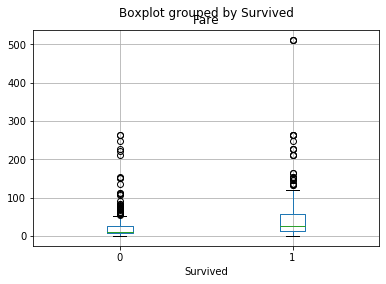

In [22]:
train_embark.boxplot(column='Fare', by='Survived')

### Lets cross verify it with co-relation graph

In [23]:
train_embark = pd.get_dummies(train_embark, columns=['Pclass'], prefix = ['class'])

In [24]:
train_embark.head()


,Survived,Sex,Age,SibSp,Parch,Fare,embark_C,embark_Q,embark_S,Family,class_1,class_2,class_3
0,0,1,22.0,1,0,7.2500,0,0,1,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0,1,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,1,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [25]:
corr = train_embark.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Sex,Age,SibSp,Parch,Fare,embark_C,embark_Q,embark_S,Family,class_1,class_2,class_3
Survived,1,-0.543351,-0.0772211,-0.0353225,0.0816294,0.257307,0.16824,0.00365038,-0.149683,0.016639,0.285904,0.0933486,-0.322308
Sex,-0.543351,1,0.0932536,-0.114631,-0.245489,-0.182333,-0.0828535,-0.0741151,0.119224,-0.200988,-0.0980131,-0.0647463,0.137143
Age,-0.0772211,0.0932536,1,-0.308247,-0.189119,0.0960667,0.0362608,-0.0224048,-0.0232328,-0.301914,0.348941,0.00695403,-0.312271
SibSp,-0.0353225,-0.114631,-0.308247,1,0.414838,0.159651,-0.0595282,-0.0263537,0.0687336,0.890712,-0.0545816,-0.0559316,0.092548
Parch,0.0816294,-0.245489,-0.189119,0.414838,1,0.216225,-0.0110688,-0.0812281,0.0608136,0.783111,-0.0176335,-0.000733897,0.0157904
Fare,0.257307,-0.182333,0.0960667,0.159651,0.216225,1,0.269335,-0.117216,-0.162184,0.217138,0.591711,-0.118557,-0.413333
embark_C,0.16824,-0.0828535,0.0362608,-0.0595282,-0.0110688,0.269335,1,-0.148258,-0.782742,-0.0462153,0.296423,-0.125416,-0.153329
embark_Q,0.00365038,-0.0741151,-0.0224048,-0.0263537,-0.0812281,-0.117216,-0.148258,1,-0.499421,-0.0585921,-0.155342,-0.127301,0.237449
embark_S,-0.149683,0.119224,-0.0232328,0.0687336,0.0608136,-0.162184,-0.782742,-0.499421,1,0.0773585,-0.161921,0.18998,-0.0151043
Family,0.016639,-0.200988,-0.301914,0.890712,0.783111,0.217138,-0.0462153,-0.0585921,0.0773585,1,-0.046114,-0.038594,0.071142


### Findings
1) From above table it is clear that survived is in negative correlation with Sex

2) SibSp and Parch is in positive correlation with Famiy

3) Class_1 is in positive correlation with Fare

4) Class_3 is in negative correlation with 

### Decisions

1) Drop SibSp , Parch and Sex is an important feature for finding out who will survive

In [26]:
train_embark =train_embark.drop(['SibSp','Parch'],axis=1)

In [27]:
train_embark.head()

,Survived,Sex,Age,Fare,embark_C,embark_Q,embark_S,Family,class_1,class_2,class_3
0,0,1,22.0,7.2500,0,0,1,1,0,0,1
1,1,0,38.0,71.2833,1,0,0,1,1,0,0
2,1,0,26.0,7.9250,0,0,1,0,0,0,1
3,1,0,35.0,53.1000,0,0,1,1,1,0,0
4,0,1,35.0,8.0500,0,0,1,0,0,0,1


In [28]:
train_embark.isnull().sum()

Survived      0
Sex           0
Age         177
Fare          0
embark_C      0
embark_Q      0
embark_S      0
Family        0
class_1       0
class_2       0
class_3       0
dtype: int64

## Finding a correct value to impute for Age 

In [29]:
print('Average age is',train_embark['Age'].mean())
print('Median age is',train_embark['Age'].median())


Average age is 29.69911764705882
Median age is 28.0


In [30]:
train_age=train_embark[(train_embark['Fare']>50) & (train_embark['Age'].notnull())]

In [31]:
train_age['Survived'].value_counts()

1    98
0    40
Name: Survived, dtype: int64

In [32]:
train_age=train_embark[(train_embark['Fare']>60) & (train_embark['Age'].notnull())]

In [33]:
train_age['Survived'].value_counts()

1    76
0    31
Name: Survived, dtype: int64

In [34]:
train_age=train_embark[(train_embark['Fare']>65) & (train_embark['Age'].notnull())]

In [35]:
train_age['Survived'].value_counts()

1    73
0    28
Name: Survived, dtype: int64

In [36]:
train_age=train_embark[(train_embark['Fare']>70) & (train_embark['Age'].notnull())]

In [37]:
train_age['Survived'].value_counts()

1    70
0    27
Name: Survived, dtype: int64

In [38]:
train_age=train_embark[(train_embark['Fare']>80) & (train_embark['Age'].notnull())]

In [39]:
train_age['Survived'].value_counts()

1    52
0    15
Name: Survived, dtype: int64

In [40]:
train_age['Age'].mean()

32.37194029850746

In [41]:
train_age['Survived'].value_counts()

1    52
0    15
Name: Survived, dtype: int64

#### Imputing missing values of age for fare > 80


In [42]:
train_age =train_embark[(train_embark['Fare']>80)]

In [43]:
#imputing missing values
train_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 27 to 879
Data columns (total 11 columns):
Survived    74 non-null int64
Sex         74 non-null int64
Age         67 non-null float64
Fare        74 non-null float64
embark_C    74 non-null uint8
embark_Q    74 non-null uint8
embark_S    74 non-null uint8
Family      74 non-null int64
class_1     74 non-null uint8
class_2     74 non-null uint8
class_3     74 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 3.9 KB


In [44]:
train_age.fillna(32,inplace=True)

/opt/conda/envs/rapids/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [45]:
train_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 27 to 879
Data columns (total 11 columns):
Survived    74 non-null int64
Sex         74 non-null int64
Age         74 non-null float64
Fare        74 non-null float64
embark_C    74 non-null uint8
embark_Q    74 non-null uint8
embark_S    74 non-null uint8
Family      74 non-null int64
class_1     74 non-null uint8
class_2     74 non-null uint8
class_3     74 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 3.9 KB


In [46]:
train_embark=train_embark[(train_embark['Fare']<=80)]

In [47]:
train_embark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 890
Data columns (total 11 columns):
Survived    817 non-null int64
Sex         817 non-null int64
Age         647 non-null float64
Fare        817 non-null float64
embark_C    817 non-null uint8
embark_Q    817 non-null uint8
embark_S    817 non-null uint8
Family      817 non-null int64
class_1     817 non-null uint8
class_2     817 non-null uint8
class_3     817 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 43.1 KB


In [48]:
train_embark['Age'].mean()

29.422333848531686

In [49]:
train_embark.fillna(29,inplace=True)

In [50]:
train_embark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 890
Data columns (total 11 columns):
Survived    817 non-null int64
Sex         817 non-null int64
Age         817 non-null float64
Fare        817 non-null float64
embark_C    817 non-null uint8
embark_Q    817 non-null uint8
embark_S    817 non-null uint8
Family      817 non-null int64
class_1     817 non-null uint8
class_2     817 non-null uint8
class_3     817 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 43.1 KB


In [51]:
train_embark = pd.concat([train_embark,train_age],ignore_index=True)

In [52]:
train_embark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
Fare        891 non-null float64
embark_C    891 non-null uint8
embark_Q    891 non-null uint8
embark_S    891 non-null uint8
Family      891 non-null int64
class_1     891 non-null uint8
class_2     891 non-null uint8
class_3     891 non-null uint8
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.1 KB


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Putting feature variable to X
X = train_embark.drop(['Survived'],axis=1)
# Putting response variable to y
y = train_embark['Survived']

In [55]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

In [56]:
import statsmodels.api as sm

In [57]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/opt/conda/envs/rapids/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -311.10
Date:                Mon, 20 Jan 2020   Deviance:                       622.20
Time:                        07:17:41   Pearson chi2:                     709.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0284      0.248      8.173      0.000       1.542       2.515
Sex           -2.6455      0.225    -11.758      0.000      -3.086      -2.204
Age           -0.0485      0.009     -5.342      0.000      -0.066      -0.031
Fare           0.0017      0.003      0.635      0.525      -0.004       0.007
embark_C       0.9008      0.220      4.094      0.000       0.470       1.332
embark_Q       0.8198      0.289      2.840      0.005       0.254       1.385
embark_S       0.3078      0.162      1.905      0.057      -0.009       0.624
Family        -0.2760      0.081     -3.421      0.001      -0.434      -0.118
class_1        1.9596      0.259      7.568      0.000       1.452       2.467
class_2        0.6666      0.178      3.752      0.000       0.318       1.015
class_3       -0.5978      0.142     -4.216      0.000      -0.876      -0.320
==============================================================================
"""

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 8)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[ True False False  True  True  True  True  True  True  True]
[1 2 3 1 1 1 1 1 1 1]


/opt/conda/envs/rapids/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/rapids/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/envs/rapids/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
X.columns[rfe.support_]

Index(['Sex', 'embark_C', 'embark_Q', 'embark_S', 'Family', 'class_1',
       'class_2', 'class_3'],
      dtype='object')

In [60]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [61]:
columns=['Sex', 'embark_C', 'embark_Q', 'embark_S', 'Family', 'class_1','class_2', 'class_3','Survived']

In [62]:
columns

['Sex',
 'embark_C',
 'embark_Q',
 'embark_S',
 'Family',
 'class_1',
 'class_2',
 'class_3',
 'Survived']

In [63]:
# Calculating Vif value
vif_cal(input_data=train_embark[columns], dependent_col='Survived')

/opt/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
1,embark_C,inf
2,embark_Q,inf
3,embark_S,inf
5,class_1,inf
6,class_2,inf
7,class_3,inf
0,Sex,1.10
4,Family,1.07


### MODEL 2

In [64]:
# Putting feature variable to X
X = train_embark[['Sex','embark_C','embark_Q','embark_S','Family','class_1','class_2','class_3',]]
# Putting response variable to y
y = train_embark['Survived']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

/opt/conda/envs/rapids/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -327.60
Date:                Mon, 20 Jan 2020   Deviance:                       655.21
Time:                        07:17:53   Pearson chi2:                     726.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0575      0.130      8.128      0.000       0.803       1.313
Sex           -2.5939      0.217    -11.962      0.000      -3.019      -2.169
embark_C       0.6596      0.199      3.312      0.001       0.269       1.050
embark_Q       0.3986      0.270      1.474      0.141      -0.131       0.929
embark_S      -0.0007      0.147     -0.005      0.996      -0.288       0.287
Family        -0.1616      0.070     -2.303      0.021      -0.299      -0.024
class_1        1.3073      0.167      7.805      0.000       0.979       1.636
class_2        0.4316      0.167      2.581      0.010       0.104       0.759
class_3       -0.6814      0.130     -5.235      0.000      -0.936      -0.426
==============================================================================
"""

In [65]:
# Putting feature variable to X
X = train_embark[['Sex','embark_C','embark_Q','Family','class_1','class_3']]
# Putting response variable to y
y = train_embark['Survived']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -327.60
Date:                Mon, 20 Jan 2020   Deviance:                       655.21
Time:                        07:17:54   Pearson chi2:                     726.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4885      0.252      5.904      0.000       0.994       1.983
Sex           -2.5939      0.217    -11.946      0.000      -3.020      -2.168
embark_C       0.6604      0.256      2.581      0.010       0.159       1.162
embark_Q       0.3993      0.376      1.063      0.288      -0.337       1.136
Family        -0.1616      0.070     -2.302      0.021      -0.299      -0.024
class_1        0.8757      0.280      3.133      0.002       0.328       1.424
class_3       -1.1130      0.251     -4.437      0.000      -1.605      -0.621
==============================================================================
"""

In [66]:
vif_cal(input_data=train_embark[['Sex','embark_C','Family','class_1','class_3','Survived']], dependent_col='Survived')

,Var,Vif
0,Sex,2.21
3,class_1,1.60
1,embark_C,1.34
2,Family,1.27
4,class_3,1.09


In [67]:
# Putting feature variable to X
X = train_embark[['Sex','embark_C','Family','class_1','class_3']]
# Putting response variable to y
y = train_embark['Survived']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)
logsk = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logsk.fit().summary()

/opt/conda/envs/rapids/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -328.16
Date:                Mon, 20 Jan 2020   Deviance:                       656.32
Time:                        07:17:55   Pearson chi2:                     720.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5195      0.251      6.047      0.000       1.027       2.012
Sex           -2.6185      0.217    -12.088      0.000      -3.043      -2.194
embark_C       0.6237      0.253      2.463      0.014       0.127       1.120
Family        -0.1695      0.070     -2.423      0.015      -0.307      -0.032
class_1        0.8855      0.280      3.164      0.002       0.337       1.434
class_3       -1.0560      0.244     -4.320      0.000      -1.535      -0.577
==============================================================================
"""

In [68]:
# Predicted probabilities
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)
y_pred = logsk.predict_proba(X_test)

/opt/conda/envs/rapids/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [70]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [71]:
# Let's see the head
y_pred_1.head()

,1
0,0.111986
1,0.594709
2,0.815649
3,0.594709
4,0.111986


In [72]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [73]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [74]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [75]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [76]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Surviving_Probability'})

In [77]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Survived','Surviving_Probability'], axis=1)

/opt/conda/envs/rapids/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [78]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Survived,Surviving_Probability
0,205,0,0.111986
1,44,1,0.594709
2,821,1,0.815649
3,458,0,0.594709
4,795,0,0.111986


In [81]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Surviving_Probability.map( lambda x: 1 if x > 0.5 else 0)

In [82]:
# Let's see the head
y_pred_final.head()

,CustID,Survived,Surviving_Probability,predicted
0,205,0,0.111986,0
1,44,1,0.594709,1
2,821,1,0.815649,1
3,458,0,0.594709,1
4,795,0,0.111986,0


In [83]:
from sklearn import metrics

In [85]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Survived, y_pred_final.predicted )
confusion

array([[100,  19],
       [ 13,  47]])

In [86]:
                  # Predicted         
#                  no        yes 
# Actual
# no               100       19
# yes               13       47  

In [87]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Survived, y_pred_final.predicted)

0.8212290502793296

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7833333333333333

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.8403361344537815

In [91]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.15966386554621848


In [92]:
# positive predictive value 
print (TP / float(TP+FP))

0.7121212121212122


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8849557522123894


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

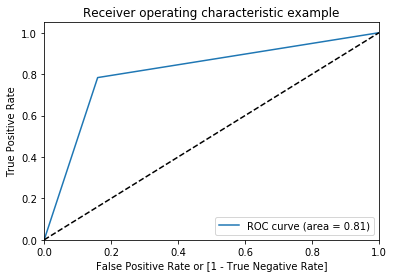

(array([0.        , 0.15966387, 1.        ]),
 array([0.        , 0.78333333, 1.        ]),
 array([2, 1, 0]))

In [96]:
draw_roc(y_pred_final.Survived, y_pred_final.predicted)

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Surviving_Probability.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Survived,Surviving_Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,205,0,0.111986,0,1,1,0,0,0,0,0,0,0,0
1,44,1,0.594709,1,1,1,1,1,1,1,0,0,0,0
2,821,1,0.815649,1,1,1,1,1,1,1,1,1,1,0
3,458,0,0.594709,1,1,1,1,1,1,1,0,0,0,0
4,795,0,0.111986,0,1,1,0,0,0,0,0,0,0,0


In [98]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Survived, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.335196  1.000000  0.000000
0.1   0.1  0.374302  0.966667  0.075630
0.2   0.2  0.664804  0.883333  0.554622
0.3   0.3  0.737430  0.850000  0.680672
0.4   0.4  0.759777  0.833333  0.722689
0.5   0.5  0.821229  0.783333  0.840336
0.6   0.6  0.798883  0.466667  0.966387
0.7   0.7  0.782123  0.383333  0.983193
0.8   0.8  0.726257  0.216667  0.983193
0.9   0.9  0.681564  0.066667  0.991597


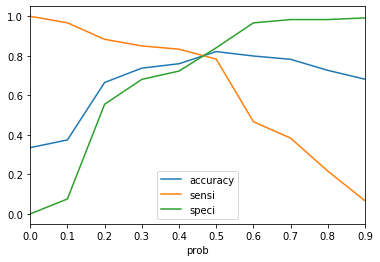

In [99]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [113]:
y_pred_final['predicted'] = y_pred_final.Surviving_Probability.map( lambda x: 1 if x > 0.45 else 0)


In [114]:
y_pred_final.head()

,CustID,Survived,Surviving_Probability,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,205,0,0.111986,0,1,1,0,0,0,0,0,0,0,0
1,44,1,0.594709,1,1,1,1,1,1,1,0,0,0,0
2,821,1,0.815649,1,1,1,1,1,1,1,1,1,1,0
3,458,0,0.594709,1,1,1,1,1,1,1,0,0,0,0
4,795,0,0.111986,0,1,1,0,0,0,0,0,0,0,0


In [115]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Survived, y_pred_final.predicted )
confusion

array([[100,  19],
       [ 12,  48]])

In [116]:
metrics.accuracy_score( y_pred_final.Survived, y_pred_final.predicted)

0.8268156424581006

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8

In [119]:
TN / float(TN+FP)

0.8403361344537815